<a href="https://colab.research.google.com/github/VnMxMadMax/DataScience-and-MachineLearning/blob/main/Linear_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# **Loading Data**

In [123]:
data = pd.read_csv("/content/drive/MyDrive/data_for_lr.csv")

**A little bit of data exploration**

In [124]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# **Data Processing**

In [126]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [127]:
data = data.dropna()
print("Shape of the data: ", data.shape)

Shape of the data:  (699, 2)


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [129]:
data.isnull().sum()

x    0
y    0
dtype: int64

# **Splitting data**

In [130]:
# training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# validation data input and output
test_input = np.array(data.x[500:699]).reshape(199,1)
test_output = np.array(data.x[500:699]).reshape(199,1)

# print the shapes
print(f"training data shape = {train_input.shape}")
print(f"training data shape = {train_output.shape}")
print(f"test input data shape = {test_input.shape}")
print(f"test output data shape = {train_output.shape}")

training data shape = (500, 1)
training data shape = (500, 1)
test input data shape = (199, 1)
test output data shape = (500, 1)


# **<font color = "green">Linear Regression</font>**

# **Forward propagation**

* f(x) = m*x + c : where m and c are the parameters that or model will learn through training.

In [131]:
def forward_propagation(train_input , parameters):
  m = parameters["m"]
  c = parameters["c"]

  predictions = np.multiply(m, train_input) + c

  return predictions

# **Defining Cost Function**

* Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5

where y are the actual or true values and f(x) are the predicted values.

In [132]:
def cost_function(predictions, train_output):

  cost = np.mean((train_output - predictions) ** 2) * 0.5

  return cost

# **Gradient Descent for Backpropagation**

Using Chain Rule:

* cost
* f = f(x)

Partial Derivative of cost function w.r.t m **dcost/dm = dcost/df * df/dm**

Partial Derivative of cost function w.r.t c **dcost/dc = dcost/df * df/dc**

Partial Derivatives:
* df = summ(f(x) - y)/n
* dm = df * x
* dc = df * 1

In [133]:
from re import X
def backward_propagation(train_input, train_output, predictions):

  derivatives = dict()

  df = (predictions - train_output)
  dm = np.mean(np.multiply(df, train_input))
  dc = np.mean(df)

  derivatives["dm"] = dm
  derivatives["dc"] = dc

  return derivatives

# **Update Parameters**

* m = m-(learning_rate * dm)
* c = c-(learning_rate*dc)

In [134]:
def update_parameters(parameters, derivatives, learning_rate):
  parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
  parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]

  return parameters

# **Model Training**

Sequence of Steps:
* Forward Propagation
* Cost Function
* Backward Propagation
* Update Parameters

In [144]:
def train(train_input, train_output, learning_rate, iters):

  # random parameters
  parameters = dict()
  parameters["m"] = np.random.uniform(0,1) * -1
  parameters["c"] = np.random.uniform(0,1) * -1

  plt.figure()

  #loss
  loss = list()

  # iteration
  for i in range(iters):

     #forward propagation
     predictions = forward_propagation(train_input, parameters)

     #cost
     cost = cost_function(predictions, train_output)

     loss.append(cost)
     print(f"Iteration = {i+1}, Loss = {cost}")

     #plot
     fig, ax = plt.subplots()

     ax.plot(train_input, train_output, "+", label = "Original")
     ax.plot(train_input, predictions, "+", label = "Original")

     legend = ax.legend()

     plt.plot(train_input, train_output, "+", label = "Original")
     plt.plot(train_input, predictions, "+", label = "Training")
     plt.show()

     #back propagation
     derivatives = backward_propagation(train_input, train_output, predictions)

     #update the parameters
     parameters = update_parameters(parameters, derivatives, learning_rate)

  return parameters, loss

# **Training**

Iteration = 1, Loss = 4671.489675119244


<Figure size 640x480 with 0 Axes>

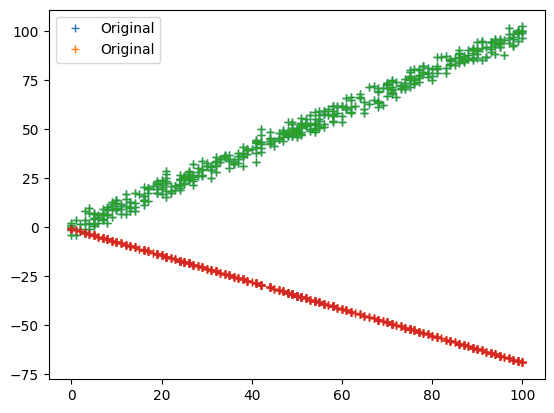

Iteration = 2, Loss = 2121.607476503895


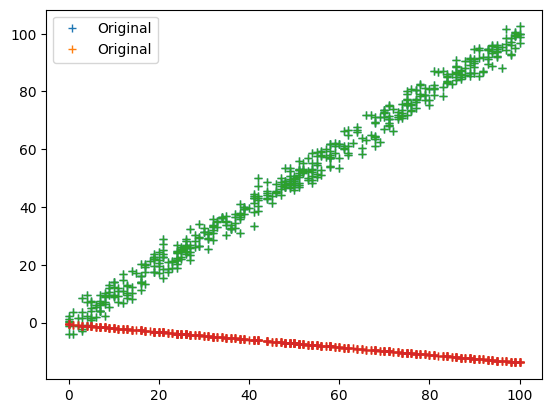

Iteration = 3, Loss = 964.7230980727581


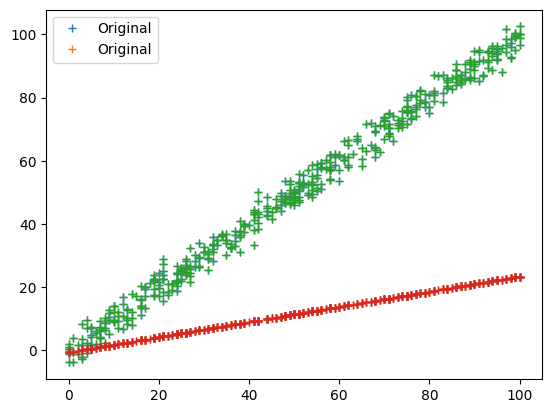

Iteration = 4, Loss = 439.8433736010238


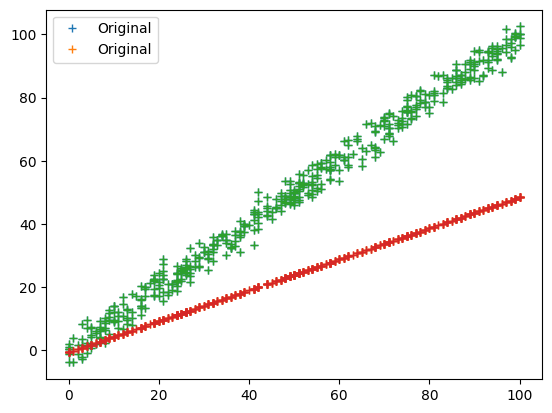

Iteration = 5, Loss = 201.70486066510108


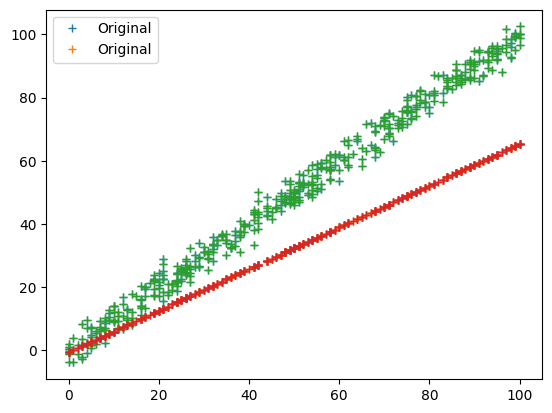

Iteration = 6, Loss = 93.66115300938813


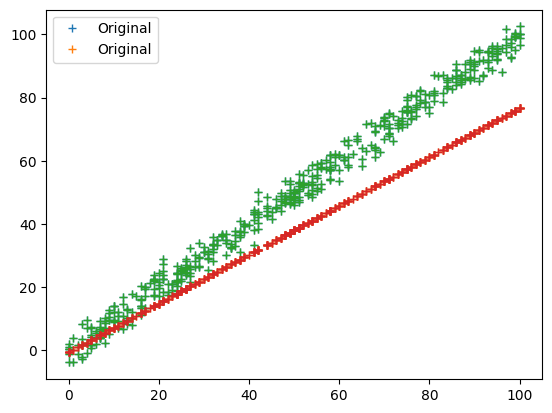

Iteration = 7, Loss = 44.641602607703


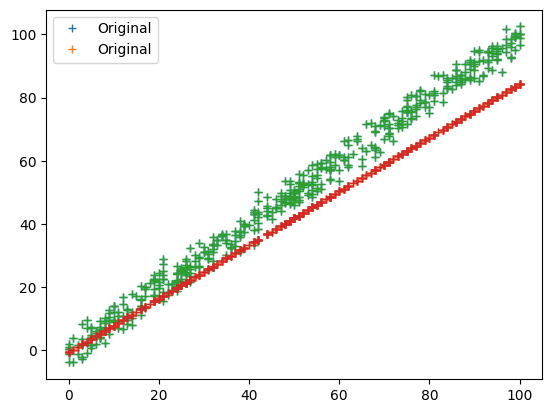

Iteration = 8, Loss = 22.401377729787914


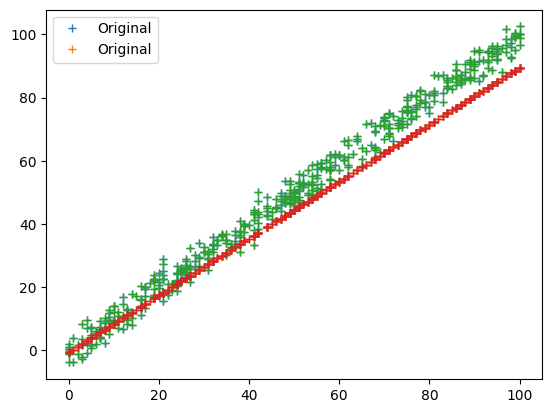

Iteration = 9, Loss = 12.310962503920353


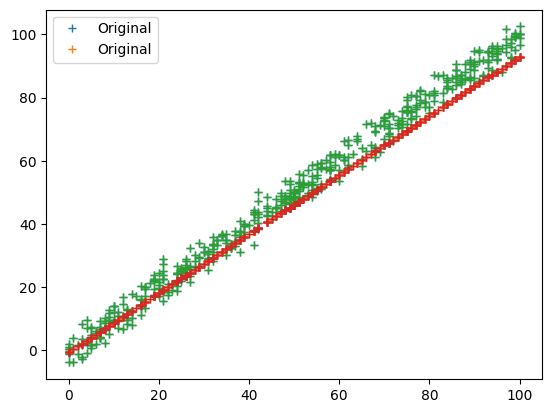

Iteration = 10, Loss = 7.732929374845091


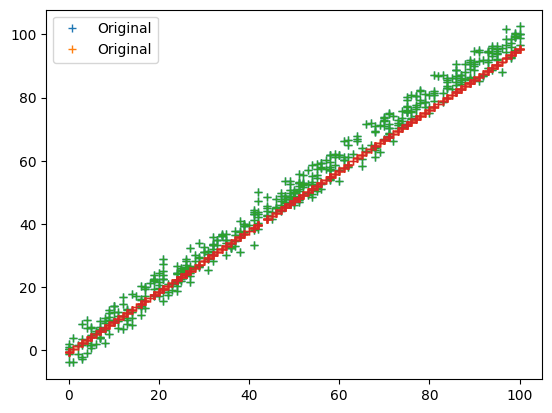

Iteration = 11, Loss = 5.655870108854563


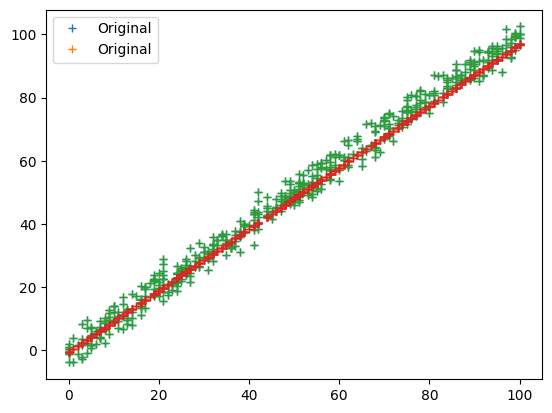

Iteration = 12, Loss = 4.713505454755734


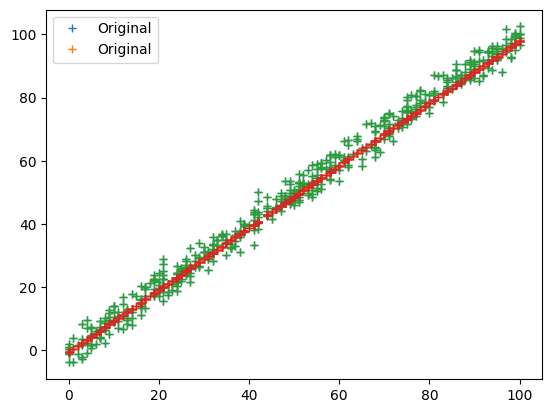

Iteration = 13, Loss = 4.285953002935104


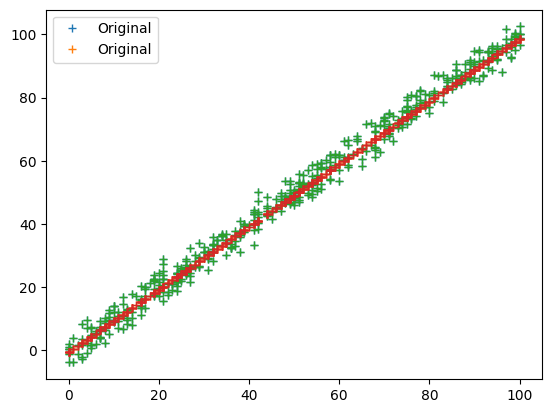

Iteration = 14, Loss = 4.091971417543748


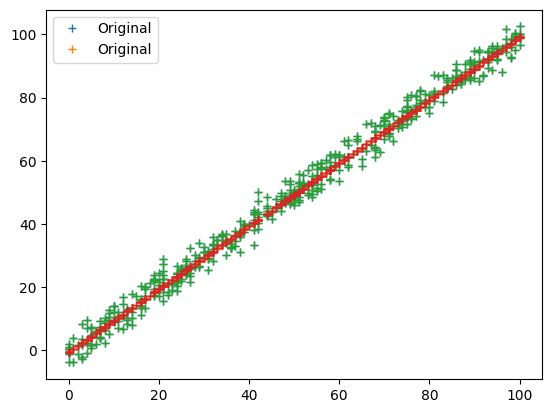

Iteration = 15, Loss = 4.003961192992501


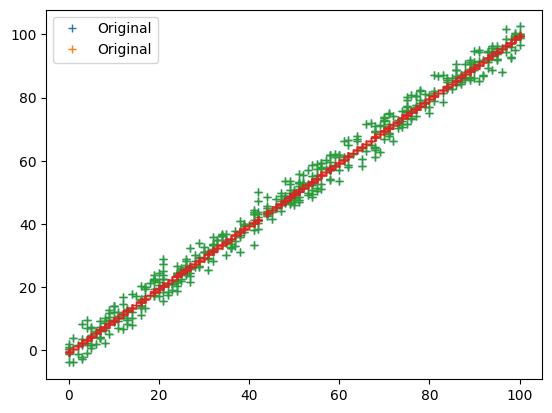

Iteration = 16, Loss = 3.964030292261095


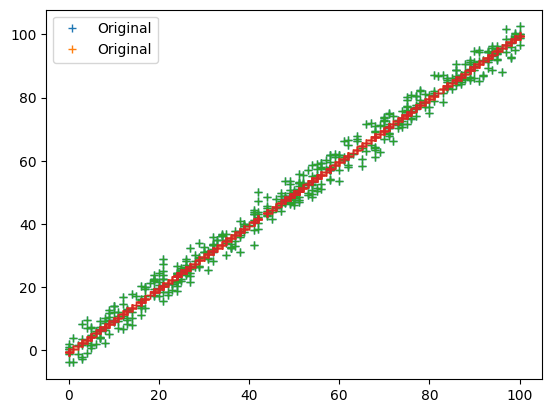

Iteration = 17, Loss = 3.9459130340298163


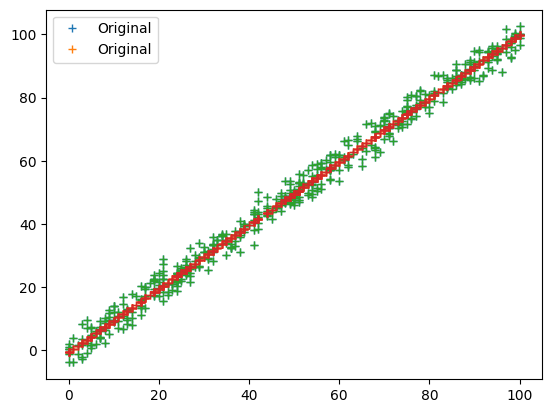

Iteration = 18, Loss = 3.9376926495909617


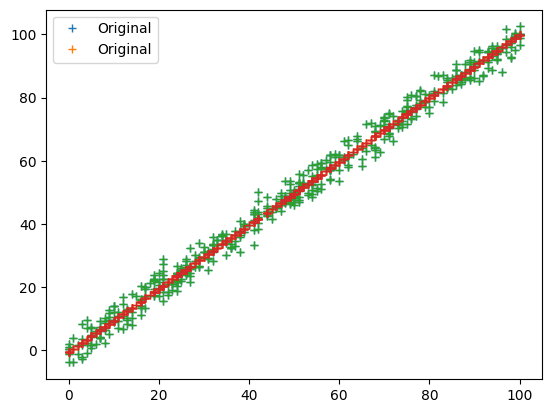

Iteration = 19, Loss = 3.9339624877823423


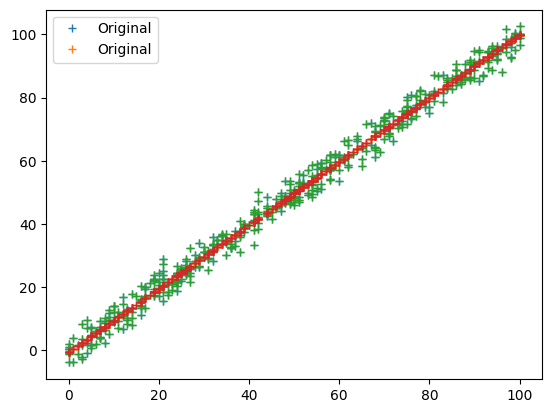

Iteration = 20, Loss = 3.9322695449830434


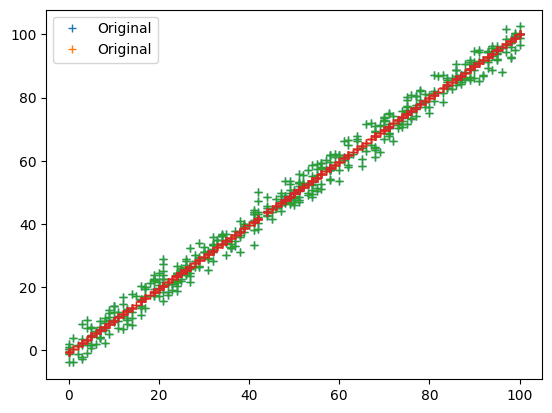

In [145]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [146]:
print(parameters)

{'m': 1.0064830937015017, 'c': -0.6394912881905056}


In [149]:
loss

[4671.489675119244,
 2121.607476503895,
 964.7230980727581,
 439.8433736010238,
 201.70486066510108,
 93.66115300938813,
 44.641602607703,
 22.401377729787914,
 12.310962503920353,
 7.732929374845091,
 5.655870108854563,
 4.713505454755734,
 4.285953002935104,
 4.091971417543748,
 4.003961192992501,
 3.964030292261095,
 3.9459130340298163,
 3.9376926495909617,
 3.9339624877823423,
 3.9322695449830434]

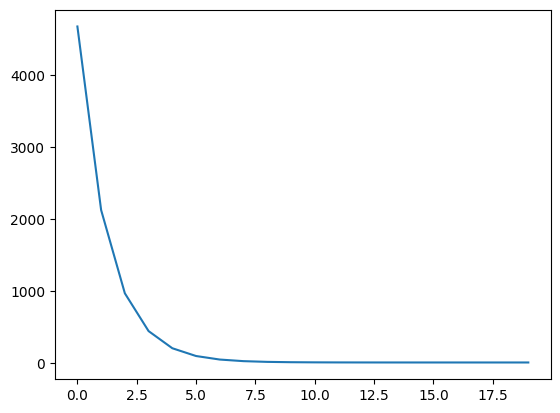

In [151]:
plt.plot(loss)

# **Let's Predict**

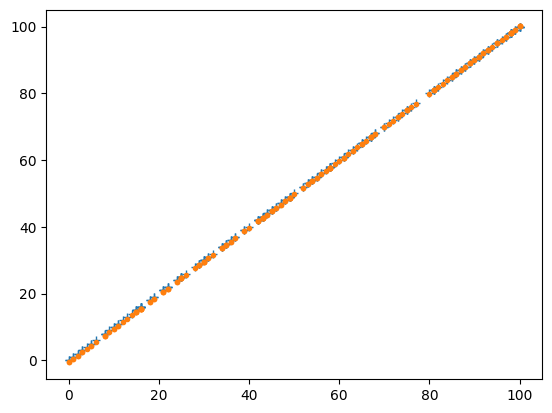

In [155]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

# **Cost for test data**

In [156]:
cost_function(test_predictions, test_output)

0.06495207824377806